<h1><i><b>Преступность в Лос‑Анджелесе</b></i></h1>

<h5><i>Двойка 4, четная<i></h5>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('la_crime_200_recs.csv')
df

,dr_number,date_reported,date_occurred,time_occurred,area_id,area_name,reporting_district,crime_code,crime_code_description,mo_codes,...,weapon_description,status_code,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,address,cross_street,location
0,1208575,3/14/13,3/11/13,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,1/25/10,1/22/10,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,3/19/13,3/18/13,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/10,11/10/10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,1/11/14,1/4/14,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),329,...,NaN,IC,Invest Cont,745,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,130100866,4/28/13,4/28/13,100,1,Central,153,888,TRESPASSING,NaN,...,NaN,IC,Invest Cont,888,NaN,NaN,NaN,500 S BROADWAY,NaN,"(34.0481, -118.2507)"
195,130100872,5/4/13,5/4/13,1300,1,Central,162,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0104 0344 1300 0326,...,NaN,AA,Adult Arrest,341,NaN,NaN,NaN,400 W 7TH ST,NaN,"(34.0459, -118.2545)"
196,101220336,7/29/10,7/29/10,2000,12,77th Street,1259,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,78TH,CENTRAL,"(33.9685, -118.2564)"
197,130100874,5/5/13,5/5/13,1015,1,Central,166,624,BATTERY - SIMPLE ASSAULT,0416 0603,...,MACE/PEPPER SPRAY,IC,Invest Cont,624,NaN,NaN,NaN,5TH ST,S SAN JULIAN ST,"(34.0446, -118.245)"


<h2><b><i>5.1. Быстрый анализ данных</i></b></h2>

<h4><b><i>- Количество строк и столбцов в таблице</i></b></h4>

In [17]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print(f'Столбцы: {rows}, колонки: {cols}')

Столбцы: 199, колонки: 26


<h4><b><i>- Типы данных столбцов</i></b></h4>

In [18]:
df.dtypes

dr_number                   int64
date_reported              object
date_occurred              object
time_occurred               int64
area_id                     int64
area_name                  object
reporting_district          int64
crime_code                  int64
crime_code_description     object
mo_codes                   object
victim_age                float64
victim_sex                 object
victim_descent             object
premise_code                int64
premise_description        object
weapon _used_code         float64
weapon_description         object
status_code                object
status_description         object
crime_code_1                int64
crime_code_2              float64
crime_code_3              float64
crime_code_4              float64
address                    object
cross_street               object
location                   object
dtype: object

<h4><b><i>- Количество пропущенных значений в таблице</i></b></h4>

In [19]:
df.isnull().sum().sum()
    

1187

<h4><b><i>- Распределение числовых переменных premise_code</i></b></h4>

array([[<Axes: title={'center': 'premise_code'}>]], dtype=object)

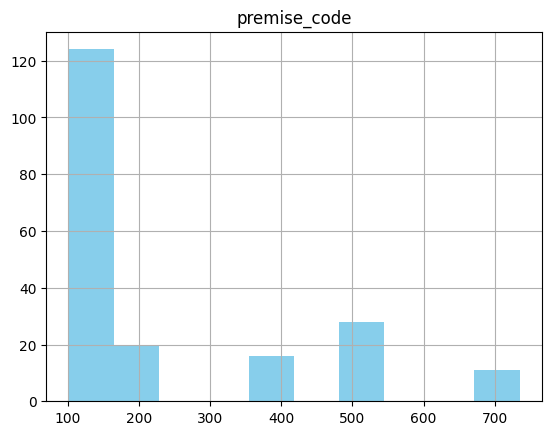

In [3]:
df.hist('premise_code', color='skyblue')

<h4><b><i>5.2. Жертвы</i></b></h4>

<i>- Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?</i>

In [21]:
gender_counts = df['victim_sex'].value_counts()

male_count = gender_counts.get('M', 0) 
female_count = gender_counts.get('F', 0)  

print(f'Женщин: {female_count}, мужчин: {male_count}.')

if {female_count}>{male_count}:
    print ('Предположение верно')
else:
    print('Предположение неверно.')

Женщин: 54, мужчин: 82.
Предположение неверно.


<h4><b><i>5.3. Преступления, пол и возраст</i></b></h4>

<p><b><i>- Как различается вероятность женщин и мужчин стать жертвой в зависимости от воз‑
раста? Постройте визуализацию. В каком возрастном промежутке мужчины чаще становятся жетрвами преступлений?</p></b></i>

In [4]:
import matplotlib.pyplot as plt
male = df[df['victim_sex'] == 'M']
female = df[df['victim_sex'] == 'F']

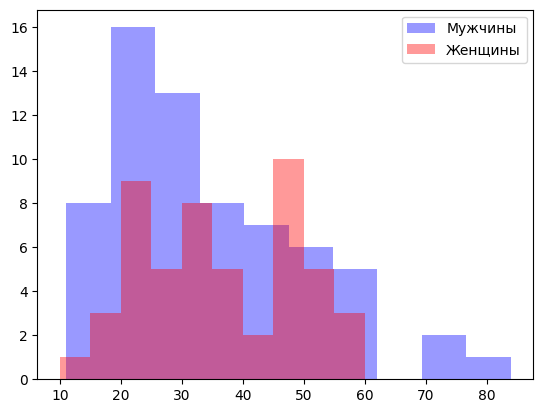

In [6]:
plt.hist(male['victim_age'], color='blue', alpha=0.4, label='Мужчины')
plt.hist(female['victim_age'], color='red', alpha=0.4, label='Женщины')
plt.legend()

<i>Из графика видно, что мужчины чаще всего становятся жертвами в возрастной группе 19-30

<p><b><i>- От каких преступлений чаще старадют женщины, а от каких мужчины?с

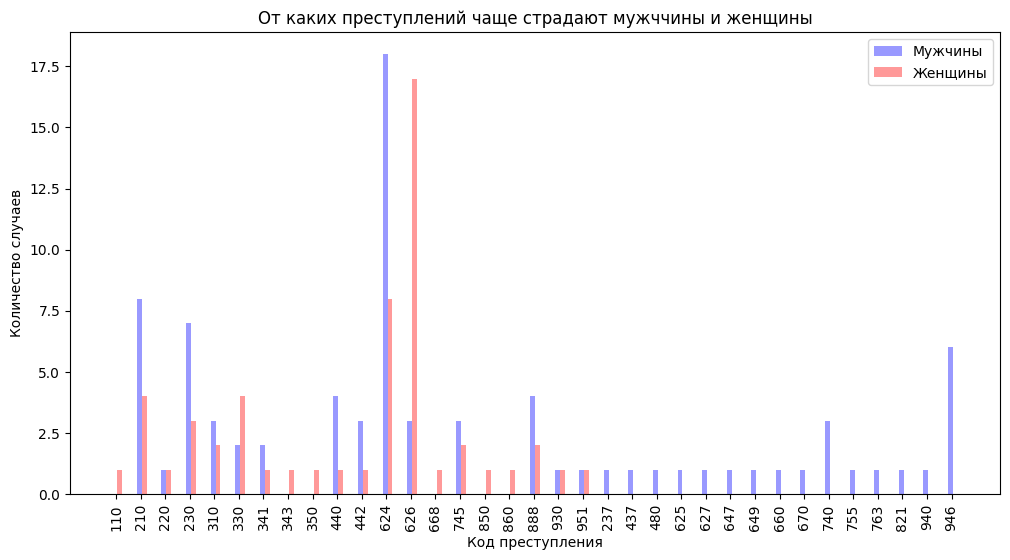

In [14]:
crime_counts = df.groupby(['victim_sex', 'crime_code']).size().unstack(fill_value=0)

male_crimes = crime_counts.loc['M']
female_crimes = crime_counts.loc['F']

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.2
x = range(len(male_crimes))
bar1 = ax.bar(x, male_crimes, width, label='Мужчины', color='blue', alpha=0.4)
bar2 = ax.bar([i + width for i in x], female_crimes, width, label='Женщины', color='red', alpha=0.4)
ax.set_xticks([i + width/4 for i in x])
ax.set_xticklabels(male_crimes.index, rotation=90)
ax.legend()
plt.title('От каких преступлений чаще страдают мужччины и женщины')
plt.xlabel('Код преступления')
plt.ylabel('Количество случаев')
plt.show()


<h4><b><i>5.4. Происхождение</i></b></h4>

In [22]:
df.victim_descent.value_counts().head(1)


victim_descent
H    62
Name: count, dtype: int64

Hispanic/Latin/Mexican чаще всего подвергаются преступлениям

<h4><b><i>5.5. Место происшествия</i></b></h4>

<p><b><i>- Люди какого происхождения чаще всего страдают от преступлений в каждом из районов? Не забудьте нормировать на общее количество жертв.</p></b></i>

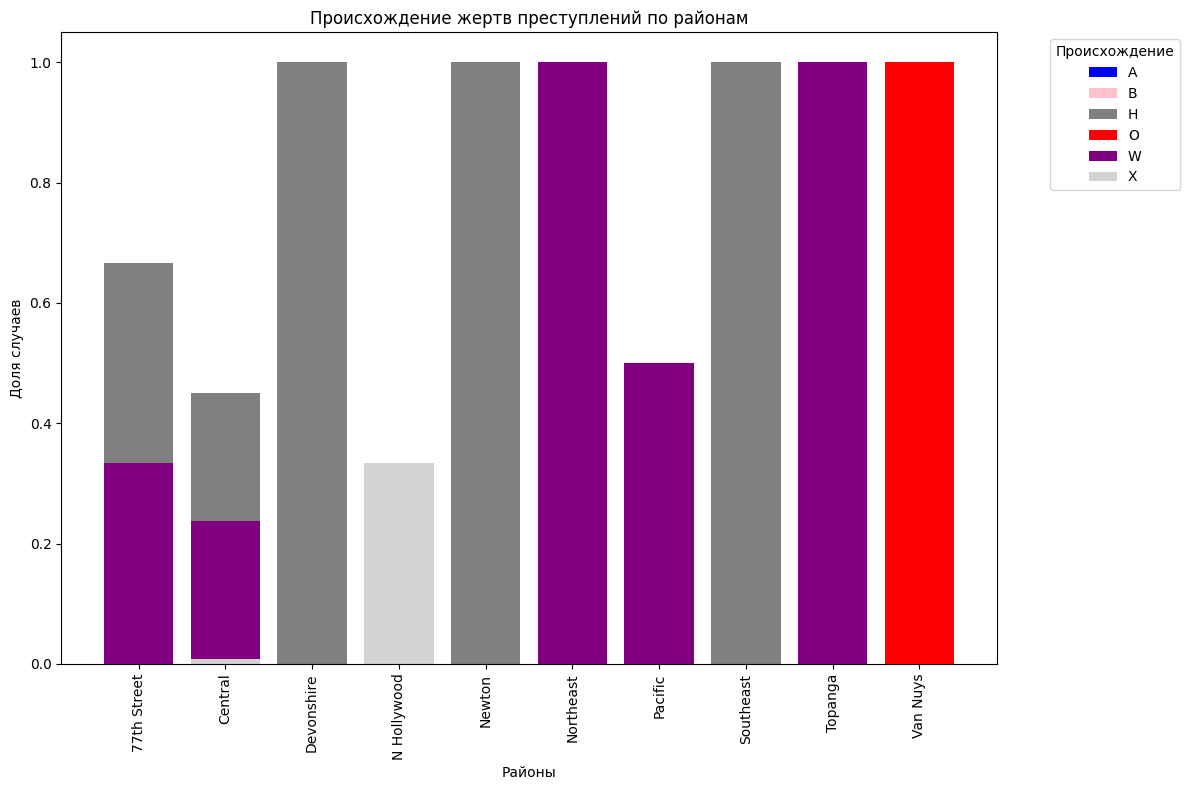

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

crime_counts = df.groupby(['area_name', 'victim_descent']).size().unstack(fill_value=0)
crime_counts_normalized = crime_counts.div(crime_counts.sum(axis=1), axis=0)

colors = ['blue', 'pink', 'gray', 'red', 'purple', 'lightgray']
fig, ax = plt.subplots(figsize=(12, 8))

for i, origin in enumerate(crime_counts_normalized.columns):
    ax.bar(crime_counts_normalized.index, crime_counts_normalized[origin], label=origin, color=colors[i % len(colors)])
ax.set_ylabel('Доля случаев')
ax.set_xlabel('Районы')
plt.title('Происхождение жертв преступлений по районам')
ax.legend(title='Происхождение', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()